In [ ]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import sys
# Ajouter le dossier src au path
sys.path.append(str(Path().resolve().parent / "src"))
sns.set(style="whitegrid")

from data_preprocessing import (
    load_data,
    compute_density,
    compute_sparsity,
)

# Revenir au dossier racine du projet
project_root = Path().resolve().parent
data_dir = project_root / "data"
# 🔄 Chargement des données
movie_genres, ratings, user_movie_matrix, movies = load_data(    
    movies_path=str(data_dir / "u.item"),
    ratings_path=str(data_dir / "u.data")
    )

Taux de remplissage (density) : 0.0635
Sparsité (sparsity) : 0.9365


In [16]:
# Dimensions des données
print(f"💾 ratings: {ratings.shape[0]} lignes, {ratings.shape[1]} colonnes")
print(f"🎬 movie_genres: {movie_genres.shape[0]} films, {movie_genres.shape[1]} colonnes")

# Premier aperçu
print("\n🎯 Aperçu de ratings:")
display(ratings.head())

print("\n🎯 Aperçu de movie_genres:")
display(movie_genres.head())

💾 ratings: 100000 lignes, 5 colonnes
🎬 movie_genres: 1682 films, 21 colonnes

🎯 Aperçu de ratings:


,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)



🎯 Aperçu de movie_genres:


,movie_id,title,unkown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
# Types de données et valeurs manquantes
print("🧮 Types et valeurs manquantes dans ratings:")
display(ratings.info())
print("\n🧮 Types et valeurs manquantes dans movie_genres:")
display(movie_genres.info())

# Nombre de valeurs manquantes par colonne
print("\n🔍 Valeurs manquantes (ratings):")
print(ratings.isnull().sum())

print("\n🔍 Valeurs manquantes (movie_genres):")
print(movie_genres.isnull().sum())

🧮 Types et valeurs manquantes dans ratings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100000 non-null  int64 
 1   movie_id   100000 non-null  int64 
 2   rating     100000 non-null  int64 
 3   timestamp  100000 non-null  int64 
 4   title      100000 non-null  object
dtypes: int64(4), object(1)
memory usage: 3.8+ MB


None


🧮 Types et valeurs manquantes dans movie_genres:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_id     1682 non-null   int64 
 1   title        1682 non-null   object
 2   unkown       1682 non-null   int64 
 3   Action       1682 non-null   int64 
 4   Adventure    1682 non-null   int64 
 5   Animation    1682 non-null   int64 
 6   Children's   1682 non-null   int64 
 7   Comedy       1682 non-null   int64 
 8   Crime        1682 non-null   int64 
 9   Documentary  1682 non-null   int64 
 10  Drama        1682 non-null   int64 
 11  Fantasy      1682 non-null   int64 
 12  Film-Noir    1682 non-null   int64 
 13  Horror       1682 non-null   int64 
 14  Musical      1682 non-null   int64 
 15  Mystery      1682 non-null   int64 
 16  Romance      1682 non-null   int64 
 17  Sci-Fi       1682 non-null   int64 
 18  Thriller     1682 

None


🔍 Valeurs manquantes (ratings):
user_id      0
movie_id     0
rating       0
timestamp    0
title        0
dtype: int64

🔍 Valeurs manquantes (movie_genres):
movie_id       0
title          0
unkown         0
Action         0
Adventure      0
Animation      0
Children's     0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64


In [18]:
# Statistiques de base sur les notes
print("📊 Statistiques descriptives des notes :")
display(ratings['rating'].describe())

📊 Statistiques descriptives des notes :


count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [ ]:
print(f"👤 Nombre d'utilisateurs uniques : {ratings['user_id'].nunique()}")
print(f"🎞️ Nombre de films uniques dans ratings : {ratings['movie_id'].nunique()}")
print(f"🎞️ Nombre de films uniques dans movie_genres : {movie_genres['movie_id'].nunique()}")
print(f"🔢 Nombre de notes différentes : {ratings['rating'].nunique()} → {ratings['rating'].unique()}")

👤 Nombre d'utilisateurs uniques : 943
🎞️ Nombre de films uniques dans ratings : 1682
🎞️ Nombre de films uniques dans movie_genres : 1682
🔢 Nombre de notes différentes : 5 → [3 1 2 4 5]


In [20]:
# 🔢 Taux de remplissage (densité) = proportion de cellules remplies dans la matrice
density = compute_density(user_movie_matrix)

# 🧊 Sparsité = proportion de cellules vides dans la matrice
sparsity = compute_sparsity(user_movie_matrix)

print(f"📈 Taux de remplissage (density) : {density:.4f}")
print(f"📉 Sparsité : {sparsity:.4f}")

📈 Taux de remplissage (density) : 0.0635
📉 Sparsité : 0.9365


In [21]:
total_cells = user_movie_matrix.shape[0] * user_movie_matrix.shape[1]
filled_cells = user_movie_matrix.notna().sum().sum()
empty_cells = total_cells - filled_cells

print(f"🔲 Taille de la matrice : {user_movie_matrix.shape[0]} utilisateurs × {user_movie_matrix.shape[1]} films")
print(f"🟦 Cellules remplies : {filled_cells:,}")
print(f"⬜ Cellules vides : {empty_cells:,}")

🔲 Taille de la matrice : 943 utilisateurs × 1664 films
🟦 Cellules remplies : 99,693
⬜ Cellules vides : 1,469,459


C:\Users\Medusa\AppData\Local\Temp\ipykernel_24116\2189450978.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ratings, x="rating", palette="coolwarm")


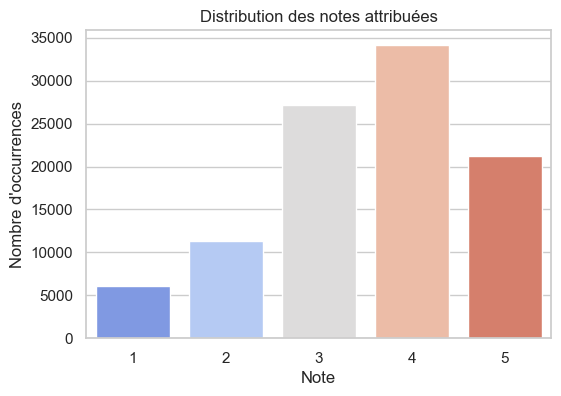

In [ ]:
# Distribution des notes
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=ratings, x="rating", palette="coolwarm")
plt.title("Distribution des notes attribuées")
plt.xlabel("Note")
plt.ylabel("Nombre d'occurrences")
plt.show()

C:\Users\Medusa\AppData\Local\Temp\ipykernel_24116\2727760145.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_movies.index, x=top_movies.values, palette="viridis")


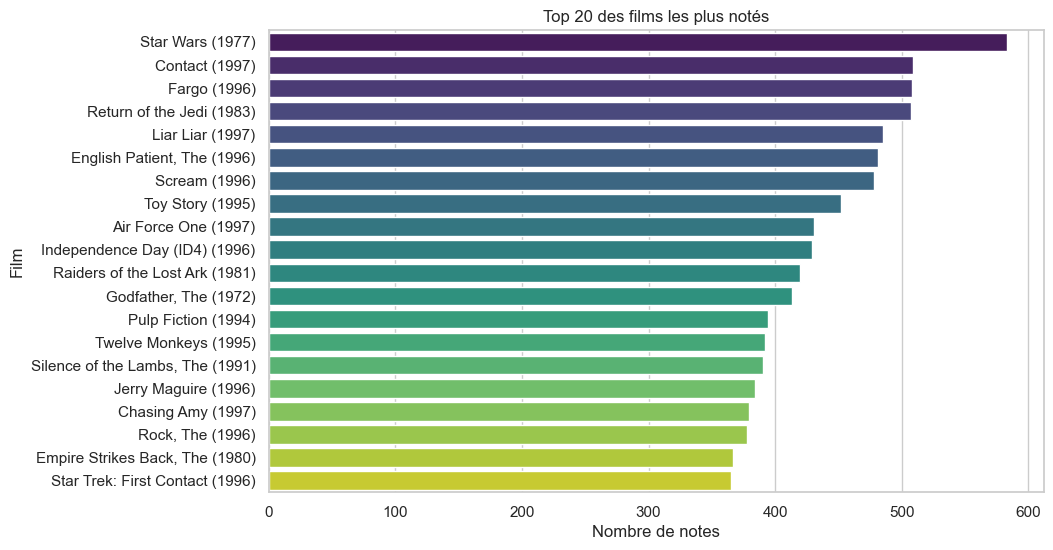

In [ ]:
# Top 20 Utilisateurs les plus actifs
top_movies = ratings['title'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_movies.index, x=top_movies.values, palette="viridis")
plt.title("Top 20 des films les plus notés")
plt.xlabel("Nombre de notes")
plt.ylabel("Film")
plt.show()

C:\Users\Medusa\AppData\Local\Temp\ipykernel_24116\582994767.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index, y=top_users.values, palette="magma")


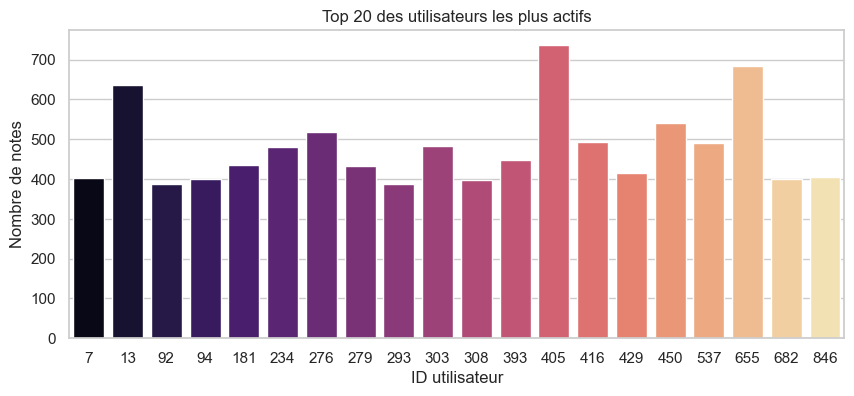

In [26]:
# Top 20 utilisateurs les plus actifs
top_users = ratings['user_id'].value_counts().head(20)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_users.index, y=top_users.values, palette="magma")
plt.title("Top 20 des utilisateurs les plus actifs")
plt.xlabel("ID utilisateur")
plt.ylabel("Nombre de notes")
plt.show()

In [ ]:
# Populatité par genre
genre_counts = movie_genres.drop(columns=["movie_id", "title"]).sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="cubehelix")
plt.title("Nombre de films par genre")
plt.xlabel("Nombre de films")
plt.ylabel("Genre")
plt.show()